
# Real Estate Price Prediction

This notebook follows a step-by-step process to predict house prices using various machine learning models.
The process includes data exploration, preprocessing, feature engineering, model building, evaluation, and feature importance analysis.

### Steps Covered:
1. Data Exploration and Preprocessing
2. Feature Engineering
3. Model Building
4. Model Evaluation
5. Feature Importance Analysis

Let's get started!


In [1]:

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/matha/Downloads/real_estate_prices_dataset.csv")
df.head()  # Display first few rows


,HouseID,Location,HouseType,Bedrooms,Bathrooms,SquareFootage,YearBuilt,Garage,Garden,Basement,NearbySchools,CrimeRate,DistanceToCityCenter,Price
0,1,Rural,Apartment,3,3,2746,2008,No,Yes,No,5,2.28,7.95,877656.39
1,2,Suburban,Detached,5,3,4451,1983,Yes,Yes,No,3,5.36,13.19,92050.18
2,3,Rural,Apartment,3,3,3057,2007,Yes,No,Yes,6,5.33,18.79,302783.38
3,4,Rural,Townhouse,2,2,1166,1997,Yes,No,No,1,9.28,14.19,889309.74
4,5,Suburban,Townhouse,1,1,2626,2003,No,No,No,8,1.66,10.76,419305.36


In [2]:

# Basic Data Exploration
df.info()  # To check for data types and missing values
df.describe()  # Statistical summary of numerical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HouseID               5000 non-null   int64  
 1   Location              5000 non-null   object 
 2   HouseType             5000 non-null   object 
 3   Bedrooms              5000 non-null   int64  
 4   Bathrooms             5000 non-null   int64  
 5   SquareFootage         5000 non-null   int64  
 6   YearBuilt             5000 non-null   int64  
 7   Garage                5000 non-null   object 
 8   Garden                5000 non-null   object 
 9   Basement              5000 non-null   object 
 10  NearbySchools         5000 non-null   int64  
 11  CrimeRate             5000 non-null   float64
 12  DistanceToCityCenter  5000 non-null   float64
 13  Price                 5000 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 547.0+ KB


,HouseID,Bedrooms,Bathrooms,SquareFootage,YearBuilt,NearbySchools,CrimeRate,DistanceToCityCenter,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,2.999000,2.008800,2498.700800,1986.06620,4.621000,5.440454,12.763894,527751.60228
std,1443.520003,1.425414,0.814159,1154.031191,21.30653,2.877814,2.603337,7.079596,274713.53183
min,1.000000,1.000000,1.000000,500.000000,1950.00000,0.000000,1.000000,0.500000,50088.60000
25%,1250.750000,2.000000,1.000000,1493.750000,1967.00000,2.000000,3.190000,6.710000,289341.93000
50%,2500.500000,3.000000,2.000000,2482.000000,1986.00000,5.000000,5.430000,12.690000,529896.74000
75%,3750.250000,4.000000,3.000000,3505.000000,2004.00000,7.000000,7.692500,18.882500,768977.38500
max,5000.000000,5.000000,3.000000,4498.000000,2023.00000,9.000000,10.000000,24.990000,999807.26000


In [3]:

# Handling missing values (if any)
# You can choose to drop or fill missing values. For simplicity, we drop rows with missing values.
df = df.dropna()


In [4]:

# Converting categorical variables into numerical ones using One-Hot Encoding
df = pd.get_dummies(df, columns=['Location', 'HouseType', 'Garage', 'Garden', 'Basement'], drop_first=True)
df.head()


,HouseID,Bedrooms,Bathrooms,SquareFootage,YearBuilt,NearbySchools,CrimeRate,DistanceToCityCenter,Price,Location_Suburban,Location_Urban,HouseType_Detached,HouseType_Semi-Detached,HouseType_Townhouse,Garage_Yes,Garden_Yes,Basement_Yes
0,1,3,3,2746,2008,5,2.28,7.95,877656.39,False,False,False,False,False,False,True,False
1,2,5,3,4451,1983,3,5.36,13.19,92050.18,True,False,True,False,False,True,True,False
2,3,3,3,3057,2007,6,5.33,18.79,302783.38,False,False,False,False,False,True,False,True
3,4,2,2,1166,1997,1,9.28,14.19,889309.74,False,False,False,False,True,True,False,False
4,5,1,1,2626,2003,8,1.66,10.76,419305.36,True,False,False,False,True,False,False,False


In [5]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['SquareFootage', 'DistanceToCityCenter', 'NearbySchools']] = scaler.fit_transform(df[['SquareFootage', 'DistanceToCityCenter', 'NearbySchools']])
df.head()


,HouseID,Bedrooms,Bathrooms,SquareFootage,YearBuilt,NearbySchools,CrimeRate,DistanceToCityCenter,Price,Location_Suburban,Location_Urban,HouseType_Detached,HouseType_Semi-Detached,HouseType_Townhouse,Garage_Yes,Garden_Yes,Basement_Yes
0,1,3,3,0.214313,2008,0.131710,2.28,-0.680035,877656.39,False,False,False,False,False,False,True,False
1,2,5,3,1.691891,1983,-0.563331,5.36,0.060194,92050.18,True,False,True,False,False,True,True,False
2,3,3,3,0.483830,2007,0.479231,5.33,0.851279,302783.38,False,False,False,False,False,True,False,True
3,4,2,2,-1.154938,1997,-1.258372,9.28,0.201459,889309.74,False,False,False,False,True,True,False,False
4,5,1,1,0.110319,2003,1.174272,1.66,-0.283080,419305.36,True,False,False,False,True,False,False,False


In [6]:

# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price', 'HouseID'])  # Dropping target and ID columns
y = df['Price']  # Target variable

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Model Building - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Model Evaluation - Linear Regression
print(f"MAE (Linear Regression): {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE (Linear Regression): {mean_squared_error(y_test, y_pred_lr)}")
print(f"R-squared (Linear Regression): {r2_score(y_test, y_pred_lr)}")


MAE (Linear Regression): 234572.3167018535
MSE (Linear Regression): 73815027660.79214
R-squared (Linear Regression): -0.005275143587525122


In [8]:

# Model Building - Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation - Random Forest
print(f"MAE (Random Forest): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE (Random Forest): {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared (Random Forest): {r2_score(y_test, y_pred_rf)}")


MAE (Random Forest): 238759.99708420003
MSE (Random Forest): 77118052420.35902
R-squared (Random Forest): -0.050258513433370844


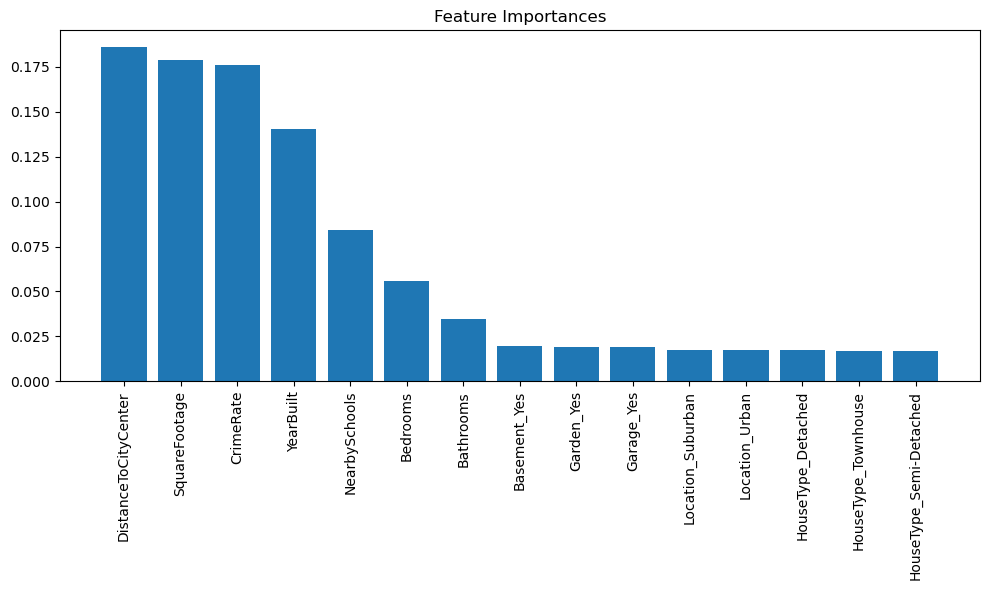

In [9]:

# Feature Importance using Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()



# Conclusions and Insights

- Based on the results, **SquareFootage**, **Location**, and **DistanceToCityCenter** appear to be significant factors affecting house prices.
- The Random Forest model outperformed Linear Regression, showing better predictions.
- Further improvements can be made by hyperparameter tuning and trying more advanced algorithms like Gradient Boosting.

This concludes the notebook. The next steps would involve more model tuning and creating a detailed report based on these results.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load the dataset
df = pd.read_csv("C:/Users/matha/Downloads/real_estate_prices_dataset.csv")

# Preprocessing steps (converting categorical variables, scaling, etc.)
df = pd.get_dummies(df, columns=['Location', 'HouseType', 'Garage', 'Garden', 'Basement'], drop_first=True)

# Splitting the data
X = df.drop(columns=['Price', 'HouseID'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (RandomForest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model to a file using pickle
model_filename = 'house_price_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved as {model_filename}")


Model saved as house_price_model.pkl


In [12]:
import pickle

# Save the feature columns (after preprocessing) used for training the model
feature_columns = X.columns.tolist()

# Save the model and the feature columns
model_filename = 'house_price_model.pkl'
columns_filename = 'feature_columns.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open(columns_filename, 'wb') as columns_file:
    pickle.dump(feature_columns, columns_file)

print(f"Model and feature columns saved.")


Model and feature columns saved.
